Inciso 6: Dependiendo del análisis exploratorio elaborado cree una variable respuesta que le
permita clasificar las casas en Económicas, Intermedias o Caras. Los límites de estas clases
deben tener un fundamento en la distribución de los datos de precios, y estar bien
explicados 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# Cargar archivo csv
datos = pd.read_csv("train.csv", encoding="latin1")


In [2]:
# Seleccionar solo las variables numéricas relevantes
numericas = datos.select_dtypes(include='number')
numericas = numericas.drop(["Fireplaces", "GarageYrBlt", "Id", "MSSubClass", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "MoSold", "YrSold"], axis=1)

Intermedias    490
Económicas     487
Caras          483
Name: Clase, dtype: int64


<AxesSubplot: xlabel='Clase', ylabel='count'>

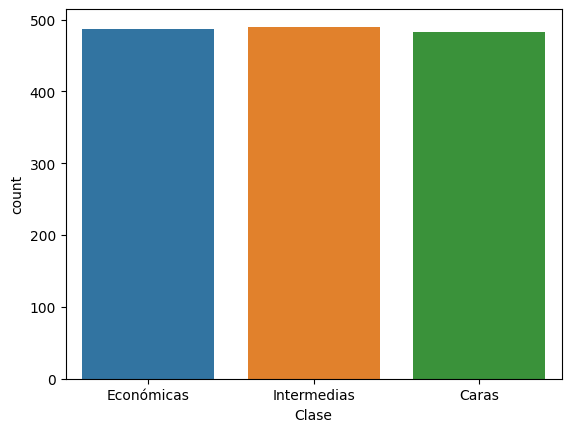

In [3]:
# Crear variable respuesta que clasifica las casas en Económicas, Intermedias o Caras
terciles = np.percentile(numericas["SalePrice"], [33.33, 66.67])
limite_economicas = terciles[0]
limite_caras = terciles[1]
numericas["Clase"] = pd.cut(numericas["SalePrice"], bins=[0, limite_economicas, limite_caras, float("inf")], labels=["Económicas", "Intermedias", "Caras"])

# Mostrar clasificación de las casas
print(numericas["Clase"].value_counts())

# Mostrar gráfico de barras de la clasificación de las casas
sns.countplot(data=numericas, x="Clase")

inciso 7 Elabore un árbol de clasificación utilizando la variable respuesta que creó en el punto
anterior. Explique los resultados a los que llega. Muestre el modelo gráficamente. Recuerde
que la nueva variable respuesta es categórica, pero se generó a partir de los precios de las
casas, no incluya el precio de venta para entrenar el modelo

In [4]:
# Dividir en conjunto de entrenamiento y prueba
X = numericas.drop(["SalePrice", "Clase"], axis=1)
Y = numericas["Clase"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7)

# Imputar valores faltantes utilizando la media de cada columna
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Crear modelo de árbol de clasificación
arbol = DecisionTreeClassifier(random_state=0)

# Entrenar modelo
arbol.fit(X_train, y_train)

# Predecir valores para conjunto de prueba
y_pred = arbol.predict(X_test)

# Evaluar precisión del modelo
precision = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", precision)

Precisión del modelo: 0.7191780821917808


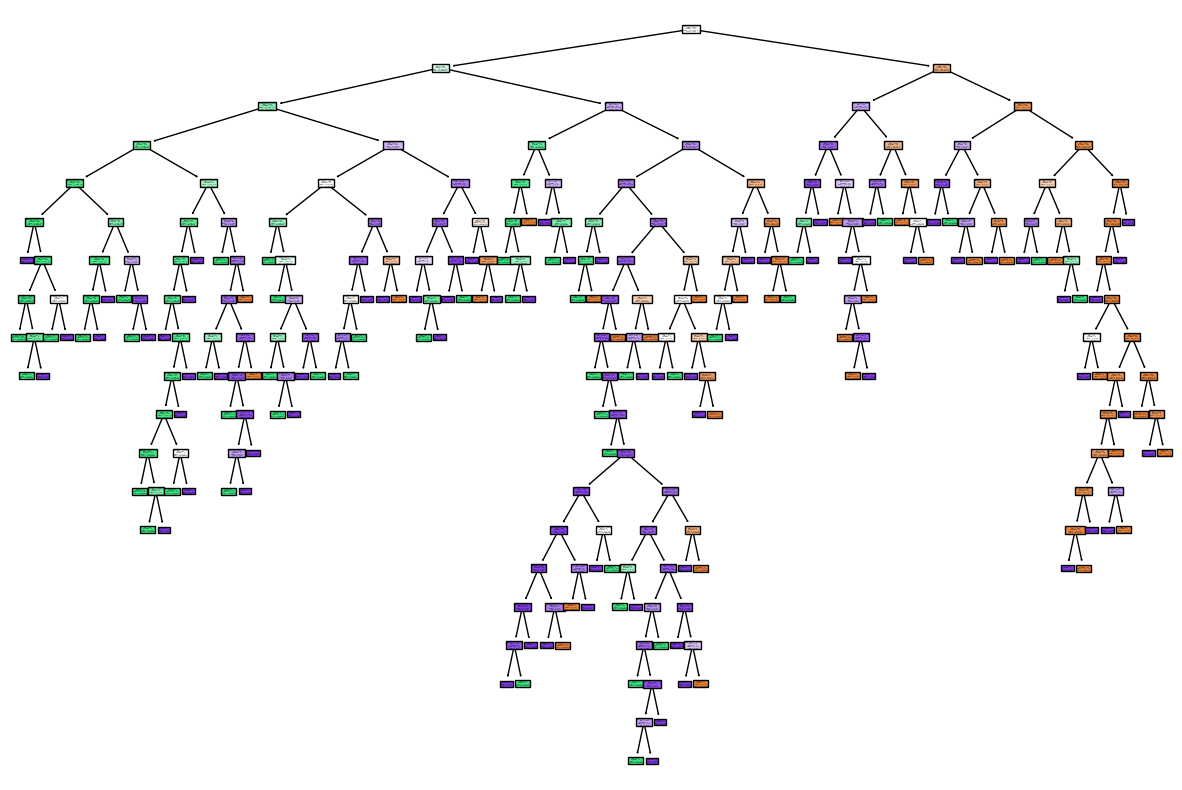

In [5]:
# Graficar árbol de clasificación
plt.figure(figsize=(15,10))
plot_tree(arbol, filled=True, feature_names=X.columns, class_names=["Económicas", "Intermedias", "Caras"])
plt.show()

inciso 8 Utilice el modelo con el conjunto de prueba y determine la eficiencia del algoritmo para
clasificar.

In [6]:
# Predecir etiquetas para conjunto de prueba
y_pred = arbol.predict(X_test)

# Calcular precisión del modelo
precision = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", precision)

Precisión del modelo: 0.7191780821917808
